In [2]:
import seaborn as sns #this is the plotting library I'll be using 
import pandas as pd #"as pd" means that we can use the abbreviation in commands
import matplotlib.pyplot as plt #we need Matplotlib for setting the labels in the Seaborn graphs
import numpy as np
from datetime import datetime

step_df = pd.read_csv('steps.csv',sep=";")
step_df.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
survey_df = pd.read_csv('survey.csv')
survey_df.head()

,id,city,gender,age,hh_size,education,education_1,height,weight
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


In [5]:
# sum steps per day
sum_steps_df = step_df.sum().reset_index(name='steps')
print(sum_steps_df)
sum_steps_df.head()

         index      steps
0           id   431985.0
1    20-6-2013    87418.0
2    21-6-2013  2195438.0
3    22-6-2013  3027319.0
4    23-6-2013  2191243.0
..         ...        ...
324   9-5-2014   679519.0
325  10-5-2014   654877.0
326  11-5-2014   551280.0
327  12-5-2014   495365.0
328  13-5-2014        0.0

[329 rows x 2 columns]


,index,steps
0,id,431985.0
1,20-6-2013,87418.0
2,21-6-2013,2195438.0
3,22-6-2013,3027319.0
4,23-6-2013,2191243.0


In [31]:
sum_steps_df = step_df.sum().reset_index(name='steps')

# mean steps per day
mean_steps = sum_steps_df['steps'].mean()
print(mean_steps)
mean_steps.head()

2190411.0455927053


AttributeError: 'float' object has no attribute 'head'

In [39]:
# cleaning data for plot
sum_steps_df = sum_steps_df[1:328] 
print(sum_steps_df)
sum_steps_df.head()

         index      steps
1    20-6-2013    87418.0
2    21-6-2013  2195438.0
3    22-6-2013  3027319.0
4    23-6-2013  2191243.0
5    24-6-2013  2871071.0
..         ...        ...
323   8-5-2014   353275.0
324   9-5-2014   679519.0
325  10-5-2014   654877.0
326  11-5-2014   551280.0
327  12-5-2014   495365.0

[327 rows x 2 columns]


,index,steps
1,20-6-2013,87418.0
2,21-6-2013,2195438.0
3,22-6-2013,3027319.0
4,23-6-2013,2191243.0
5,24-6-2013,2871071.0


In [38]:
# mean steps per day for one person
mean_steps_df = step_df.mean().reset_index(name='mean steps')
mean_steps_df = mean_steps_df[1:328]
print(mean_steps_df)
mean_steps_df.head()

         index    mean steps
1    20-6-2013   3642.416667
2    21-6-2013   9034.724280
3    22-6-2013  10889.636691
4    23-6-2013   7402.847973
5    24-6-2013   8110.370056
..         ...           ...
323   8-5-2014   7209.693878
324   9-5-2014   9570.690141
325  10-5-2014   7614.848837
326  11-5-2014   6805.925926
327  12-5-2014   7505.530303

[327 rows x 2 columns]


,index,mean steps
1,20-6-2013,3642.416667
2,21-6-2013,9034.724280
3,22-6-2013,10889.636691
4,23-6-2013,7402.847973
5,24-6-2013,8110.370056


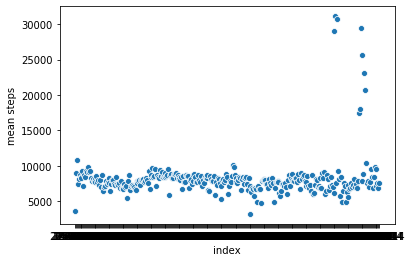

In [41]:
plot_step = pd.DataFrame(mean_steps_df)
plot_step['mean steps'] = plot_step['mean steps']
plot_step['index'] = plot_step['index']
sns.scatterplot(data = plot_step, x="index", y="mean steps")

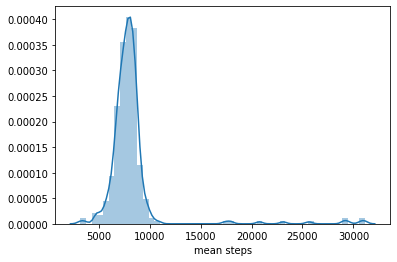

In [43]:
plot_step = pd.DataFrame(mean_steps_df)
plot_step['mean steps'] = plot_step['mean steps']
plot_step['index'] = plot_step['index'].apply(pd.to_datetime, errors='coerce')
sns.distplot(plot_step['mean steps'])         
plt.show()